# Anlysis of different Clusters
In our notebook `DBScan.ipynb` we did a spatial clustering. <br>
If we take a closer look to the clusters we can label each cluster as <i>humanmade</i>, <i> building</i> or <i>vegetation</i>.

We have the labels for 838 clusters clusters. The goal of this notebook is to use the labeled data to train a Random Forest in order to label all clusters. 

<b>This Jupyter-Notebook is part of a master thesis with the topic<br>
<i>Analysis of deep learning methods for semantic segmentation of photogrammetric point clouds from aerial images</i><br>
&copy; Markus Hülsen, Matr.-Nr. 6026370<br>
Date: 15.08.2023</b>

## Librarys

In [1]:
import pandas as pd
import numpy as np
import laspy
import os
from tqdm.notebook import tqdm 

## Import data
First we define a function to import a las-file to an DataFrame

In [2]:
def import_las_to_Dataframe(path):
    with laspy.open(path) as f:
        las = f.read()
    
    # read coordinates from las
    x = np.array(las.x)
    y = np.array(las.y)
    z = np.array(las.z)

    df = pd.DataFrame({'X':x,'Y':y,'Z':z},index=np.arange(len(x)))

    for i in range(3, len(las.point_format.dimensions)):
        dim = las.point_format.dimensions[i].name
        df[dim] = np.array(las[dim])
     
    return df

Define the path where each cluster is stored.<br>
Get the paths of each cluster.

In [3]:
path1 = '../../Daten/Datensatz_H3D/DIM_2022/7 - DBScan/classified556000_5801000'
path2 = '../../Daten/Datensatz_H3D/DIM_2022/7 - DBScan/classified554000_5798000'

# get the sub-folders of the paths
lst_folders = []
for folder in os.listdir(path1):
    lst_folders.append(path1 + '/' + folder)

for folder in os.listdir(path2):
    lst_folders.append(path2 + '/' + folder)
    

lst_folders = sorted(lst_folders)

print('Found', len(lst_folders), 'folders.')
print('First folder:', lst_folders[0])

Found 24 folders.
First folder: ../../Daten/Datensatz_H3D/DIM_2022/7 - DBScan/classified554000_5798000/cluster_0.0


So we have 12 folders which corresponds to the KMeans clustering, based on the color. <br>
In every folder we have the clusters from DBScan as an `.las` file and a corresponding <i>Ground Truth</i>

First example lets look at the cluster 0.

In [4]:
# path for cluster 0
cluster = lst_folders[0]

# get the path of every las files
lst_files = []

for file in os.listdir(cluster):
    if file.endswith('.las'):
        lst_files.append(cluster + '/' + file)
lst_files = sorted(lst_files)

print('Found', len(lst_files), 'las-files')
print('First file:', lst_files[0])

Found 30 las-files
First file: ../../Daten/Datensatz_H3D/DIM_2022/7 - DBScan/classified554000_5798000/cluster_0.0/label_0.las


As we can see the first cluster has a `label_-1` in his name. These clusters are noise points, so we don't have a label for them.<br>
Next we will create a function which ignores files with `label_-1`.

In [5]:
def get_paths(path):
    
    paths = {}
    lst_files = []
    
    for file in os.listdir(path):
        # Get path of the ground truth, which is stored as csv file
        if file. endswith('ground_truth.csv'):
            paths['ground_truth'] = path + '/' + file
        
        # Get paths of the las-files
        if file.endswith('.las'):
            # ignore files with label_-1
            if file != 'label_-1.las':
                lst_files.append(path + '/' + file)
    
    # sort the list with the las-files
    lst_files = sorted(lst_files)
    paths['las'] = lst_files
    
    return paths

In [6]:
paths = get_paths(lst_folders[0])
print('Ground truth:\t', paths['ground_truth'])
print('Found', len(paths['las']), 'corresponding clusters')

Ground truth:	 ../../Daten/Datensatz_H3D/DIM_2022/7 - DBScan/classified554000_5798000/cluster_0.0/cluster0_ground_truth.csv
Found 30 corresponding clusters


Take a look at the first las-file.

In [7]:
df = import_las_to_Dataframe(paths['las'][0]).drop(['X', 'Y', 'Z', 'return_number', 'scan_direction_flag', 'edge_of_flight_line', 'synthetic', 'key_point', 'withheld', 
                                                    'scan_angle_rank', 'point_source_id', 'gps_time', 'red', 'green', 'blue', 'label', 'classification', 'number_of_returns'], axis=1)
df

,intensity,user_data,Hue,Saturation,Value,count_building,std_z,linearity,planarity,eigenentropy,curvature change,local_pointdensity,roughness,delta_z,z_to_dem,inside_road,count_veg,count_ground,dbscan_cluster
0,9883,194,0.436508,0.218750,0.375000,44.0,0.923516,0.906461,-0.369673,-1.308000,0.297551,1.454093,0.212544,-1.0,0.879869,0.0,13.0,35.0,0.0
1,9219,194,0.427536,0.250000,0.359375,47.0,0.925060,0.911805,-0.341949,-1.308030,0.283299,1.562552,0.130030,-1.0,0.961652,0.0,13.0,33.0,0.0
2,11821,71,0.500000,0.104167,0.187500,54.0,0.864351,-8.738035,-4.906873,-1.345823,0.576959,1.589284,0.095486,-1.0,0.771765,0.0,0.0,42.0,0.0
3,8780,106,0.444444,0.269231,0.304688,90.0,0.393581,-10.667744,-4.141472,-1.145436,0.555158,1.832388,0.034979,-1.0,2.002273,0.0,0.0,0.0,0.0
4,8695,86,0.433333,0.294118,0.265625,90.0,0.402842,-10.481987,-5.735661,-1.320312,0.579726,1.708977,0.123241,-1.0,2.152071,0.0,0.0,0.0,0.0
5,8461,86,0.440000,0.316456,0.308594,89.0,0.394547,-9.385221,-4.876750,-1.293601,0.572742,1.561191,0.298344,-1.0,2.306574,0.0,0.0,0.0,0.0
6,8466,103,0.477778,0.217391,0.269531,91.0,0.398479,-14.144011,-4.303488,-0.941700,0.546408,1.662090,0.618525,-1.0,1.394015,0.0,0.0,0.0,0.0
7,8693,69,0.430108,0.322917,0.375000,90.0,0.411492,-9.287809,-6.185733,-1.414657,0.593398,1.397937,0.367844,-1.0,2.440245,0.0,0.0,0.0,0.0
8,7748,135,0.435484,0.319588,0.378906,84.0,0.416045,0.597568,0.336141,-2.172841,0.045135,1.028197,1.058639,-1.0,3.081128,0.0,0.0,0.0,0.0
9,7755,97,0.446667,0.242718,0.402344,91.0,0.410605,-13.973705,-2.398081,-0.959432,0.520964,1.584434,0.626993,-1.0,1.393472,0.0,0.0,0.0,0.0


Now that we have the ground truth and the las-file from each cluster we want to create a function wich is able to calculate different statistics for every cluster.

In [8]:
def calc_statistics(df_cluster, index):
    # calculate mean
    mean = df_cluster.mean()
    df_mean = mean.rename(index).to_frame().T.add_prefix('mean_')
    
    # calculate standarddeviation
    std = df_cluster.std(axis=0)
    df_std= std.rename(index).to_frame().T.add_prefix('std_')
    
    # concat mean and std
    df_statistics = pd.concat([df_mean, df_std], axis=1)
    
    # count number of point 
    df_statistics['num_points'] = len(df_cluster)
    
    return df_statistics

In [9]:
index = paths['las'][0].split('/')[-1].replace('.las','')
calc_statistics(df, index)

,mean_intensity,mean_user_data,mean_Hue,mean_Saturation,mean_Value,mean_count_building,mean_std_z,mean_linearity,mean_planarity,mean_eigenentropy,...,std_curvature change,std_local_pointdensity,std_roughness,std_delta_z,std_z_to_dem,std_inside_road,std_count_veg,std_count_ground,std_dbscan_cluster,num_points
label_0,8743.642857,110.142857,0.458401,0.242755,0.317801,69.571426,0.5931,-6.519753,-2.67265,-1.21366,...,0.196626,0.237753,0.324262,0.0,0.785856,0.0,6.663415,25.106476,0.0,14


Tak a look at the ground truth.

In [10]:
pd.read_csv(paths['ground_truth'], sep='\t', index_col='cluster').head()

,label
cluster,
0,building
1,vegetation
2,vegetation
3,vegetation
4,vegetation


## Start processing for every file

Now we iterate throw each file and calculate some statistics

In [11]:
df = pd.DataFrame()

for folder in tqdm(lst_folders):
    file_name = folder.split('/')[-2].replace('classified','')
    
    paths = get_paths(folder)
    
    # get the name of the cluster in colorspace
    cluster_name = folder.split('/')[-1].replace('.0', '').replace('luster_', '')
    
    # get the ground truth of every cluster
    gt = pd.read_csv(paths['ground_truth'], sep='\t', index_col='cluster')
    
    df_temp = pd.DataFrame()
    # iterate throw every file
    for file in paths['las']:
        
        # index of the spatial cluster
        index = int(file.split('/')[-1].replace('.las','').replace('label_',''))

        # import dataframe
        df_cluster = import_las_to_Dataframe(file)
        df_cluster = df_cluster.rename({'curvature__change': 'curvature change', 'Eigenentropy':'eigenentropy', 'Planarity': 'planarity', 'Linearity':'linearity', 'local pointdensity':'local_pointdensity', 'local__pointdensity':'local_pointdensity'}, axis=1)

        # clean dataframe
        drop_features = ['X', 'Y', 'Z', 'return_number', 'scan_direction_flag', 'edge_of_flight_line', 'synthetic', 'key_point', 'withheld', 
                         'scan_angle_rank', 'point_source_id', 'gps_time', 'red', 'green', 'blue', 'label', 'classification', 'inside_road']
        df_cluster = df_cluster.drop(drop_features, axis=1)

        # Add statistics to temporary to DataFrame
        df_temp = pd.concat([df_temp, calc_statistics(df_cluster, index)])
    
    # merge statistics with Ground Truth
    df_temp = pd.merge(df_temp.sort_index(), gt, left_index=True, right_index=True)
    
    # rename index
    df_temp = df_temp.set_index(file_name + '_' + cluster_name + '_l' + df_temp.index.astype(str))
    # add results to DataFrame
    df = pd.concat([df, df_temp])
    
    
df.index.name = 'cluster'
df

  0%|          | 0/24 [00:00<?, ?it/s]

,mean_intensity,mean_number_of_returns,mean_user_data,mean_Hue,mean_Saturation,mean_Value,mean_count_building,mean_std_z,mean_linearity,mean_planarity,...,std_roughness,std_delta_z,std_z_to_dem,std_count_veg,std_count_ground,std_dbscan_cluster,num_points,label,Unnamed: 2,probability
cluster,,,,,,,,,,,,,,,,,,,,,
554000_5798000_c0_l0,8743.642857,3.000000,110.142857,0.458401,0.242755,0.317801,69.571426,0.593100,-6.519753,-2.672650,...,0.324262,0.0,0.785856,6.663415,25.106476,0.0,14,building,NaN,NaN
554000_5798000_c0_l1,9261.235294,2.529412,138.764706,0.395122,0.167469,0.297105,56.117645,0.867406,-0.658667,-0.042129,...,0.386488,0.0,0.897373,4.023826,18.805700,0.0,17,vegetation,NaN,NaN
554000_5798000_c0_l2,8888.500000,3.375000,111.187500,0.481603,0.245260,0.274170,55.875000,0.557858,-15.236795,2.919165,...,0.196490,0.0,0.179541,6.942322,7.569401,0.0,16,vegetation,NaN,NaN
554000_5798000_c0_l3,9012.400000,2.800000,130.400000,0.489808,0.216113,0.251563,74.800003,0.877182,-1.971182,-1.215533,...,0.272093,0.0,0.356075,12.316656,0.000000,0.0,5,vegetation,NaN,NaN
554000_5798000_c0_l4,9108.884615,2.576923,126.000000,0.480546,0.201561,0.308744,61.038460,0.742628,-0.709933,0.187005,...,0.272287,0.0,1.054889,8.122522,11.746554,0.0,26,vegetation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556000_5801000_c9_l44,8047.562500,4.750000,115.187500,0.556705,0.024949,0.855225,0.000000,0.528875,-5.115622,-0.690955,...,0.149487,NaN,0.231097,1.527525,6.867496,NaN,16,auto,NaN,NaN
556000_5801000_c9_l45,8479.500000,4.375000,99.000000,0.543899,0.029905,0.835938,0.000000,0.358472,-3.261286,0.136813,...,0.102231,NaN,0.105965,0.000000,1.069045,NaN,8,auto,NaN,NaN
556000_5801000_c9_l46,8116.346154,4.615385,121.538462,0.578449,0.013550,0.888522,0.000000,0.359269,-10.196135,-1.142110,...,0.149492,NaN,0.148935,0.000000,3.264729,NaN,26,auto,NaN,NaN


In [12]:
# set label 'auto' to 'humanmade'
df.loc[df.label == 'auto', 'label'] = 'humanmade'

## Split data in train and predict
After we imported the data we need to split the dataset into a dataset for training and a dataset for prediction.<br>
We need the ground truth for the trainingdata and don't have it for out prediction dataset.

For our training we only values where we got the ground truth.<br>
We will drop all `NaN` values.

In [13]:
df_train = df.dropna(axis=1)
df_train

,mean_intensity,mean_number_of_returns,mean_user_data,mean_Hue,mean_Saturation,mean_Value,mean_count_building,mean_std_z,mean_linearity,mean_planarity,...,std_planarity,std_eigenentropy,std_curvature change,std_local_pointdensity,std_roughness,std_z_to_dem,std_count_veg,std_count_ground,num_points,label
cluster,,,,,,,,,,,,,,,,,,,,,
554000_5798000_c0_l0,8743.642857,3.000000,110.142857,0.458401,0.242755,0.317801,69.571426,0.593100,-6.519753,-2.672650,...,2.904333,0.389740,0.196626,0.237753,0.324262,0.785856,6.663415,25.106476,14,building
554000_5798000_c0_l1,9261.235294,2.529412,138.764706,0.395122,0.167469,0.297105,56.117645,0.867406,-0.658667,-0.042129,...,0.678972,2.325167,0.191675,0.150518,0.386488,0.897373,4.023826,18.805700,17,vegetation
554000_5798000_c0_l2,8888.500000,3.375000,111.187500,0.481603,0.245260,0.274170,55.875000,0.557858,-15.236795,2.919165,...,4.284968,0.380215,0.070098,0.357640,0.196490,0.179541,6.942322,7.569401,16,vegetation
554000_5798000_c0_l3,9012.400000,2.800000,130.400000,0.489808,0.216113,0.251563,74.800003,0.877182,-1.971182,-1.215533,...,2.093236,0.819590,0.225237,0.293638,0.272093,0.356075,12.316656,0.000000,5,vegetation
554000_5798000_c0_l4,9108.884615,2.576923,126.000000,0.480546,0.201561,0.308744,61.038460,0.742628,-0.709933,0.187005,...,0.952249,1.334973,0.150159,0.357057,0.272287,1.054889,8.122522,11.746554,26,vegetation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556000_5801000_c9_l44,8047.562500,4.750000,115.187500,0.556705,0.024949,0.855225,0.000000,0.528875,-5.115622,-0.690955,...,1.605077,0.202171,0.198915,0.204172,0.149487,0.231097,1.527525,6.867496,16,humanmade
556000_5801000_c9_l45,8479.500000,4.375000,99.000000,0.543899,0.029905,0.835938,0.000000,0.358472,-3.261286,0.136813,...,1.128583,0.570581,0.221281,0.121715,0.102231,0.105965,0.000000,1.069045,8,humanmade
556000_5801000_c9_l46,8116.346154,4.615385,121.538462,0.578449,0.013550,0.888522,0.000000,0.359269,-10.196135,-1.142110,...,3.765297,0.173500,0.245139,0.160855,0.149492,0.148935,0.000000,3.264729,26,humanmade


For the values with a `NaN`-label, we want to predict the right label. <br>
We will drop the label out of the DataFrame and additional drop all NaN-values.

In [14]:
labels = df_train.label.unique()
labels

array(['building', 'vegetation', 'humanmade', 'ground'], dtype=object)

How often does every value occur?

In [15]:
for label in labels:
    print(' ' * (10 - len(label)), label, '\t-->\t', len(df_train.loc[df_train.label == label]), 'trainingsdatasets')

   building 	-->	 192 trainingsdatasets
 vegetation 	-->	 344 trainingsdatasets
  humanmade 	-->	 274 trainingsdatasets
     ground 	-->	 110 trainingsdatasets


In [16]:
import matplotlib.pyplot as plt

## Train Random Forest
Now that we got the trainingsdata, we can go on and train a decision tree with our data.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

Drop some irrelevant Features.

In [19]:
drop_feature = []#'eigenentropy', 'roughness', 'z_to_dem', 'number_of_returns', 'intensity']
df_train = df_train.drop(drop_feature, axis=1, errors='ignore')
df_train

,mean_intensity,mean_number_of_returns,mean_user_data,mean_Hue,mean_Saturation,mean_Value,mean_count_building,mean_std_z,mean_linearity,mean_planarity,...,std_planarity,std_eigenentropy,std_curvature change,std_local_pointdensity,std_roughness,std_z_to_dem,std_count_veg,std_count_ground,num_points,label
cluster,,,,,,,,,,,,,,,,,,,,,
554000_5798000_c0_l0,8743.642857,3.000000,110.142857,0.458401,0.242755,0.317801,69.571426,0.593100,-6.519753,-2.672650,...,2.904333,0.389740,0.196626,0.237753,0.324262,0.785856,6.663415,25.106476,14,building
554000_5798000_c0_l1,9261.235294,2.529412,138.764706,0.395122,0.167469,0.297105,56.117645,0.867406,-0.658667,-0.042129,...,0.678972,2.325167,0.191675,0.150518,0.386488,0.897373,4.023826,18.805700,17,vegetation
554000_5798000_c0_l2,8888.500000,3.375000,111.187500,0.481603,0.245260,0.274170,55.875000,0.557858,-15.236795,2.919165,...,4.284968,0.380215,0.070098,0.357640,0.196490,0.179541,6.942322,7.569401,16,vegetation
554000_5798000_c0_l3,9012.400000,2.800000,130.400000,0.489808,0.216113,0.251563,74.800003,0.877182,-1.971182,-1.215533,...,2.093236,0.819590,0.225237,0.293638,0.272093,0.356075,12.316656,0.000000,5,vegetation
554000_5798000_c0_l4,9108.884615,2.576923,126.000000,0.480546,0.201561,0.308744,61.038460,0.742628,-0.709933,0.187005,...,0.952249,1.334973,0.150159,0.357057,0.272287,1.054889,8.122522,11.746554,26,vegetation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556000_5801000_c9_l44,8047.562500,4.750000,115.187500,0.556705,0.024949,0.855225,0.000000,0.528875,-5.115622,-0.690955,...,1.605077,0.202171,0.198915,0.204172,0.149487,0.231097,1.527525,6.867496,16,humanmade
556000_5801000_c9_l45,8479.500000,4.375000,99.000000,0.543899,0.029905,0.835938,0.000000,0.358472,-3.261286,0.136813,...,1.128583,0.570581,0.221281,0.121715,0.102231,0.105965,0.000000,1.069045,8,humanmade
556000_5801000_c9_l46,8116.346154,4.615385,121.538462,0.578449,0.013550,0.888522,0.000000,0.359269,-10.196135,-1.142110,...,3.765297,0.173500,0.245139,0.160855,0.149492,0.148935,0.000000,3.264729,26,humanmade


Set trainingsdata and ground-truth to numpy-Array .

In [20]:
X = df_train.drop('label', axis=1).to_numpy()
y = df_train.label.to_numpy()

Split into a train and test data, to evalute the accuracy.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train model with our data.

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Predict the labels for out test-split

In [25]:
#Predict the response for test dataset
y_pred = rf.predict(X_test)

Calculate the accuary of our model.

In [26]:
# Model Accuracy: how often is the classifier correct?
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.7554347826086957


Calculate the importance of every attribute

In [27]:
# extract the feature importance
importance = rf.feature_importances_

# sort the feature importances in descending order
indices = np.argsort(importance)[::-1]

# features for learning
features = df_train.drop('label', axis=1).columns

# print the feature ranking
print('Feature Ranking:')
for i, index in enumerate(indices):
    print(f'{i + 1}. {features[index]}: \timportance {importance[index]}')

Feature Ranking:
1. mean_z_to_dem: 	importance 0.07214418607537994
2. mean_std_z: 	importance 0.06782558541968993
3. mean_count_building: 	importance 0.06069731940853176
4. mean_Saturation: 	importance 0.054440797694737864
5. mean_count_veg: 	importance 0.049628682890991614
6. std_Hue: 	importance 0.047636840042273296
7. mean_Value: 	importance 0.041969099950112304
8. std_count_building: 	importance 0.039376227245485895
9. std_std_z: 	importance 0.03761720012382002
10. mean_Hue: 	importance 0.037068995747624046
11. mean_count_ground: 	importance 0.032569921298618465
12. std_Value: 	importance 0.032061193179295615
13. std_z_to_dem: 	importance 0.02912106581235101
14. mean_local_pointdensity: 	importance 0.0284630983025025
15. mean_intensity: 	importance 0.02741886724044178
16. std_linearity: 	importance 0.024122131308795106
17. std_eigenentropy: 	importance 0.023915968956926728
18. std_count_veg: 	importance 0.023802678110829086
19. std_Saturation: 	importance 0.019700420999856673
20. m

In [28]:
for j in range(5, len(features)):
    train_features = []
    for i in range(j):
        train_features.append(features[indices[i]])

    X2 = df_train.loc[:, train_features].to_numpy()

    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

    rf2 = RandomForestClassifier()
    rf2.fit(X2_train, y2_train)

    # Model Accuracy: how often is the classifier correct?
    acc = accuracy_score(y2_test, rf2.predict(X2_test))
    print('Accuracy: ', acc, 'with', j, 'attributs')

Accuracy:  0.6521739130434783 with 5 attributs
Accuracy:  0.6902173913043478 with 6 attributs
Accuracy:  0.7282608695652174 with 7 attributs
Accuracy:  0.7554347826086957 with 8 attributs
Accuracy:  0.7282608695652174 with 9 attributs
Accuracy:  0.75 with 10 attributs
Accuracy:  0.7336956521739131 with 11 attributs
Accuracy:  0.7282608695652174 with 12 attributs
Accuracy:  0.7336956521739131 with 13 attributs
Accuracy:  0.7663043478260869 with 14 attributs
Accuracy:  0.7336956521739131 with 15 attributs
Accuracy:  0.7228260869565217 with 16 attributs
Accuracy:  0.7445652173913043 with 17 attributs
Accuracy:  0.7391304347826086 with 18 attributs
Accuracy:  0.75 with 19 attributs
Accuracy:  0.7391304347826086 with 20 attributs
Accuracy:  0.7228260869565217 with 21 attributs
Accuracy:  0.7336956521739131 with 22 attributs
Accuracy:  0.75 with 23 attributs
Accuracy:  0.7554347826086957 with 24 attributs
Accuracy:  0.7445652173913043 with 25 attributs
Accuracy:  0.7663043478260869 with 26 a

New training with best number of attributs.

In [31]:
train_features = []
for i in range(10):
    train_features.append(features[indices[i]])

X = df_train.loc[:, train_features].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Model Accuracy: how often is the classifier correct?
acc = accuracy_score(y_test, rf.predict(X_test))
print('Accuracy: ', acc)

Accuracy:  0.7554347826086957


show train features:

In [32]:
train_features

['mean_z_to_dem',
 'mean_std_z',
 'mean_count_building',
 'mean_Saturation',
 'mean_count_veg',
 'std_Hue',
 'mean_Value',
 'std_count_building',
 'std_std_z',
 'mean_Hue']

In [33]:
# extract the feature importance
importance = rf.feature_importances_

# sort the feature importances in descending order
indices = np.argsort(importance)[::-1]

# features for learning
features = train_features

# print the feature ranking
print('Feature Ranking:')
for i, index in enumerate(indices):
    print(f'{i + 1}. {features[index]}: \timportance {importance[index]}')

Feature Ranking:
1. mean_z_to_dem: 	importance 0.1511110526423559
2. mean_std_z: 	importance 0.13104682033616838
3. mean_Saturation: 	importance 0.11379149412091784
4. mean_count_veg: 	importance 0.09979803392639953
5. mean_Value: 	importance 0.09183403834778796
6. mean_count_building: 	importance 0.08957650131478836
7. std_Hue: 	importance 0.0866042614652768
8. mean_Hue: 	importance 0.08368135821224539
9. std_count_building: 	importance 0.07633270689064392
10. std_std_z: 	importance 0.07622373274341583


### Visualisation

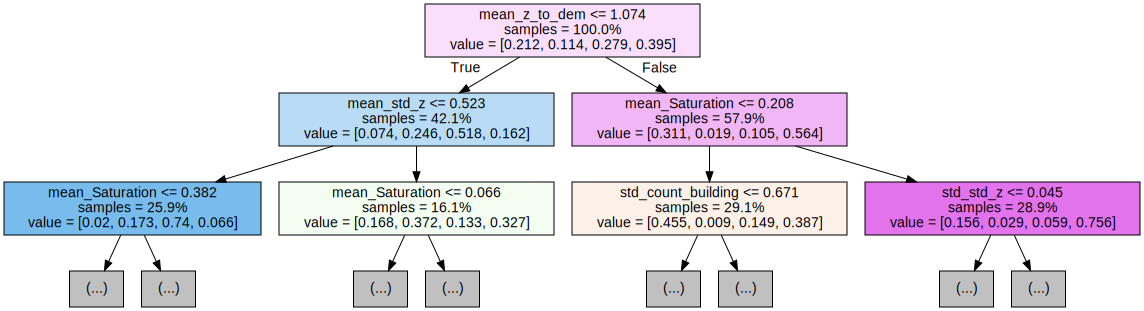

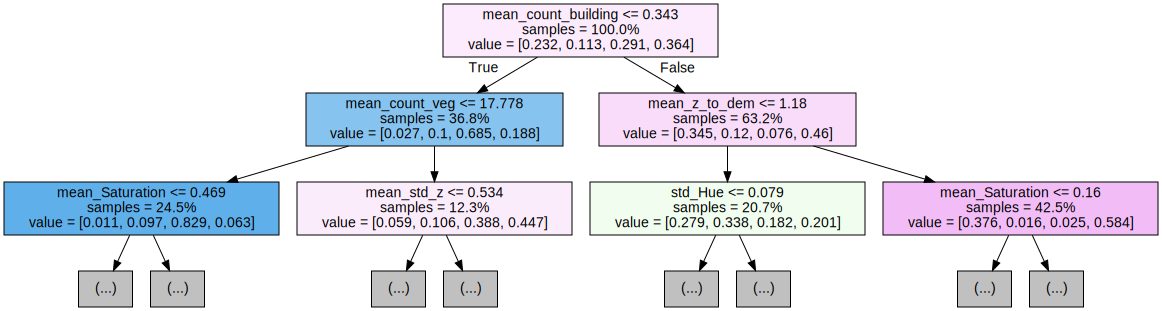

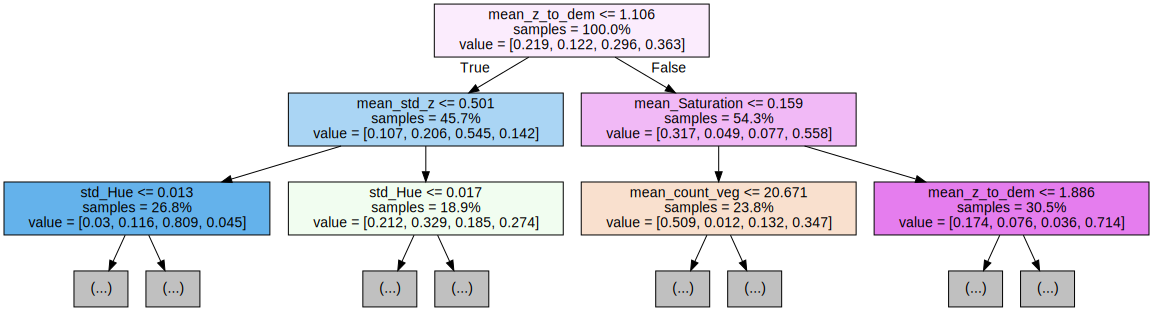

In [34]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=features,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph);

## Save model
Now that we have the best performing random forest model, we want to save the model.

In [35]:
import joblib

In [36]:
# save
joblib.dump(rf, "./random_forest.joblib")

['./random_forest.joblib']

Now that we have a trained Random Forest Classificator, we can use it to classify every cluster.<br>
Take a look at the notebook `DBSCAN-RF.ipynb` to do so.